## Import Library ##

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('punkt_tab')

from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk.tokenize import  sent_tokenize
from wordcloud import WordCloud

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## Input Data ##

In [ ]:
df=pd.read_csv('data_Bismilah_SEMHAS .csv')
df

Unnamed: 0                                          statement  \
0               0  Please, it would really appreciated if someone...   
1               1  could you imagine angel eva fight against tita...   
2               2  i am on week on prozac and experiencing no rea...   
3               3           i hope so. i have to go to the bathroom.   
4               4  I cannot get a grip (: I have wasted everyone ...   
...           ...                                                ...   
29719       29719  "Fuck you bitch, I can make your life hell and...   
29720       29720  You've only been playing for a while, don't be...   
29721       29721  My mom [54F] has catered to his every need sin...   
29722       29722  Nothing excites me anymore its just an activit...   
29723       29723  [Kinda Gross] Hey what is this in my throat, I...   

           status  
0        Suicidal  
1      Depression  
2      Depression  
3          Normal  
4        Suicidal  
...           ...  
29719      Stress  
29720      Normal  
29721      Normal  
29722    Suicidal  
29723     Anxiety  

[29724 rows x 3 columns]

In [ ]:
df = df.loc[df['status'] != 'Suicidal'].reset_index(drop=True)
df

Unnamed: 0                                          statement  \
0               1  could you imagine angel eva fight against tita...   
1               2  i am on week on prozac and experiencing no rea...   
2               3           i hope so. i have to go to the bathroom.   
3               5  I feel like I never stood a chance I was made ...   
4               6  but of course the document with the important ...   
...           ...                                                ...   
24677       29718  Hey reddit. I do not know what is wrong with m...   
24678       29719  "Fuck you bitch, I can make your life hell and...   
24679       29720  You've only been playing for a while, don't be...   
24680       29721  My mom [54F] has catered to his every need sin...   
24681       29723  [Kinda Gross] Hey what is this in my throat, I...   

           status  
0      Depression  
1      Depression  
2          Normal  
3      Depression  
4          Normal  
...           ...  
24677  Depression  
24678      Stress  
24679      Normal  
24680      Normal  
24681     Anxiety  

[24682 rows x 3 columns]

In [ ]:
df['word_count'] = df['statement'].apply(lambda x: len(word_tokenize(x)))
# Menampilkan statistik untuk setiap label
word = df.groupby('status')[['word_count']].describe()
word

word_count                                              \
                          count        mean         std   min    25%    50%   
status                                                                        
Anxiety                  3673.0  140.237408  116.831325   1.0  45.00  112.0   
Bipolar                  2606.0  170.689179  112.159330   7.0  83.25  143.0   
Depression               7158.0  147.342135  112.813065   6.0  56.00  117.0   
Normal                   7754.0   20.575445   26.263545   3.0   7.00   12.0   
Personality disorder     1016.0  173.110236  121.203544   6.0  73.00  148.0   
Stress                   2475.0  123.120404   78.954537  16.0  77.00  100.0   

                                     
                         75%    max  
status                               
Anxiety               204.00  553.0  
Bipolar               231.00  648.0  
Depression            213.75  526.0  
Normal                 21.00  311.0  
Personality disorder  249.25  568.0  
Stress                142.50  558.0

In [ ]:
# Filter data dengan label 'Personality disorder' dan word_count > 200
contoh = df[df['word_count'] > 450]

# Menampilkan hasil
contoh

Unnamed: 0                                          statement  \
75             94  I think my brother is depressed and I'm unsure...   
99            129  Finally getting better. My anxiety was to a po...   
300           379  Hello Reddit! I apologize in advance for any g...   
344           435  Jesus taught avoidance I'm certain I'd be diag...   
368           467  Feeling depressed and have to leave the house ...   
...           ...                                                ...   
24160       29103  What is this Feeling? So occasionally, I'll ha...   
24271       29238  Hi!First, I am very sorry for the errors, engl...   
24631       29664  so after being seriously depressed for months ...   
24668       29708  Slipping Into A "Classic" Depression Very Weir...   
24676       29717  Hi all,I write this just because I need to let...   

                     status  word_count  
75               Depression         472  
99                  Anxiety         495  
300              Depression         490  
344    Personality disorder         482  
368                 Bipolar         458  
...                     ...         ...  
24160                Stress         525  
24271            Depression         464  
24631            Depression         487  
24668               Bipolar         464  
24676            Depression         483  

[289 rows x 4 columns]

In [ ]:
data = df[df['word_count'] <= 450]


In [ ]:
data

Unnamed: 0                                          statement  \
0               1  could you imagine angel eva fight against tita...   
1               2  i am on week on prozac and experiencing no rea...   
2               3           i hope so. i have to go to the bathroom.   
3               5  I feel like I never stood a chance I was made ...   
4               6  but of course the document with the important ...   
...           ...                                                ...   
24677       29718  Hey reddit. I do not know what is wrong with m...   
24678       29719  "Fuck you bitch, I can make your life hell and...   
24679       29720  You've only been playing for a while, don't be...   
24680       29721  My mom [54F] has catered to his every need sin...   
24681       29723  [Kinda Gross] Hey what is this in my throat, I...   

           status  word_count  
0      Depression          17  
1      Depression          45  
2          Normal          12  
3      Depression         229  
4          Normal          17  
...           ...         ...  
24677  Depression         105  
24678      Stress         100  
24679      Normal          40  
24680      Normal         168  
24681     Anxiety          39  

[24393 rows x 4 columns]

In [ ]:
data.groupby('status')[['word_count']].describe()

word_count                                              \
                          count        mean         std   min    25%    50%   
status                                                                        
Anxiety                  3600.0  133.276944  107.130515   1.0  44.00  110.0   
Bipolar                  2535.0  161.725444   99.795511   7.0  82.00  139.0   
Depression               7061.0  142.861918  106.845793   6.0  56.00  115.0   
Normal                   7754.0   20.575445   26.263545   3.0   7.00   12.0   
Personality disorder      988.0  163.782389  109.174596   6.0  71.75  141.5   
Stress                   2455.0  120.014664   71.298549  16.0  76.00  100.0   

                                     
                         75%    max  
status                               
Anxiety               198.00  450.0  
Bipolar               222.00  448.0  
Depression            206.00  450.0  
Normal                 21.00  311.0  
Personality disorder  241.25  448.0  
Stress                141.00  450.0

## Visualisasi Data ##

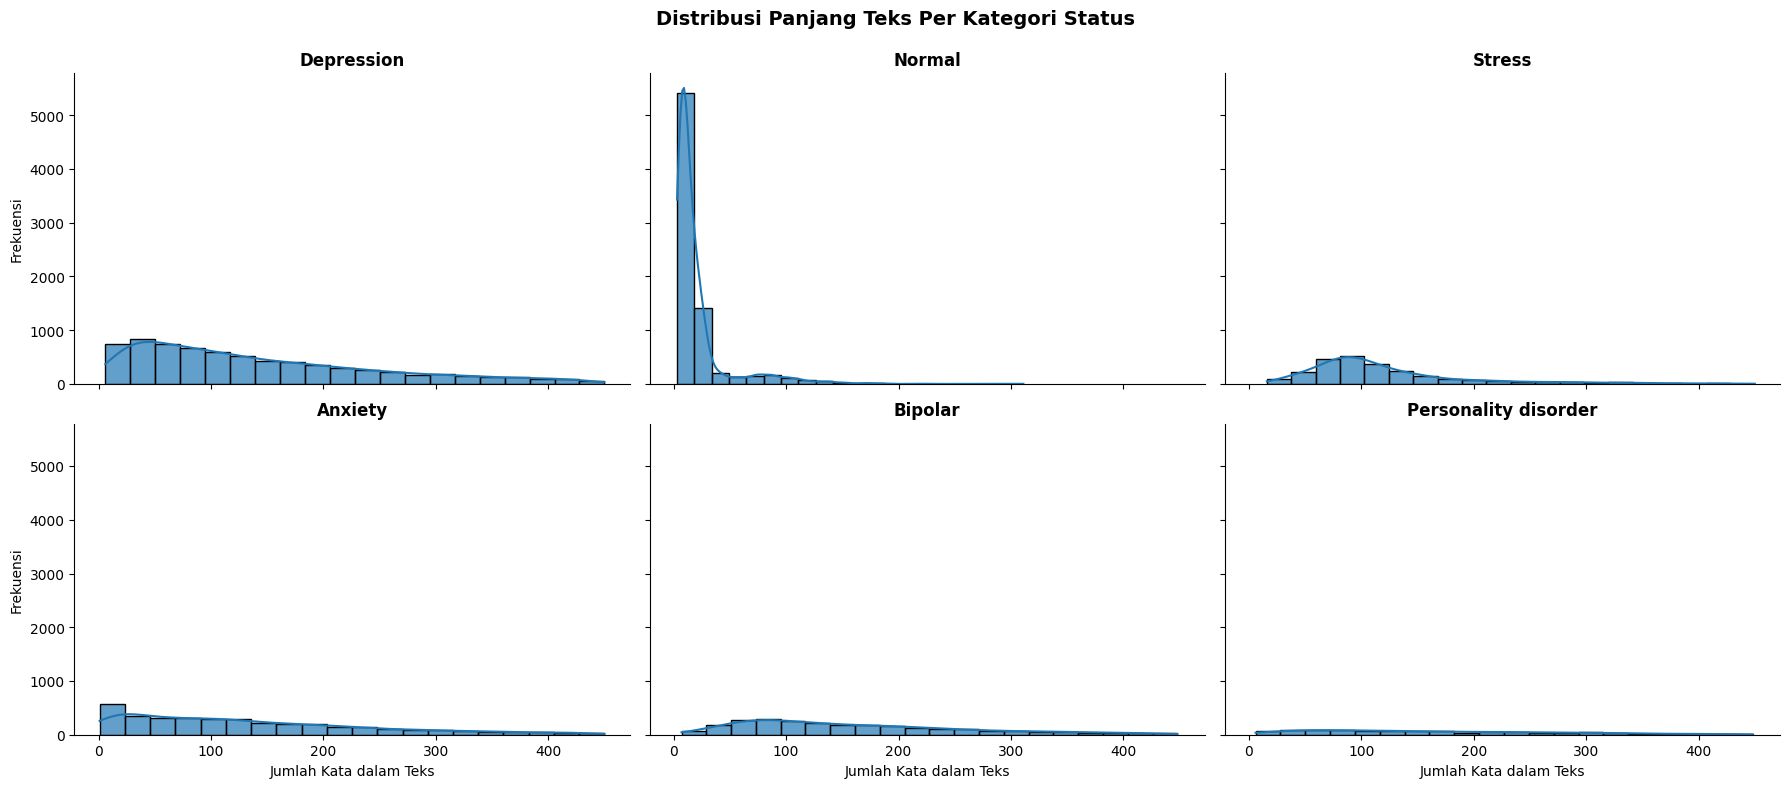

In [ ]:
# Menentukan palet warna
palette = sns.color_palette("husl", n_colors=data['status'].nunique())

# Membuat grid plot untuk setiap kategori status
g = sns.FacetGrid(data, col="status", col_wrap=3, sharex=True, sharey=True, height=4, aspect=1.5)
g.map(sns.histplot, "word_count", bins=20, kde=True, alpha=0.7, edgecolor="black")

# Menyesuaikan tampilan
g.set_axis_labels("Jumlah Kata dalam Teks", "Frekuensi")
g.set_titles(col_template="{col_name}", size=12, fontweight="bold")
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle("Distribusi Panjang Teks Per Kategori Status", fontsize=14, fontweight="bold")

# Menampilkan plot
plt.show()

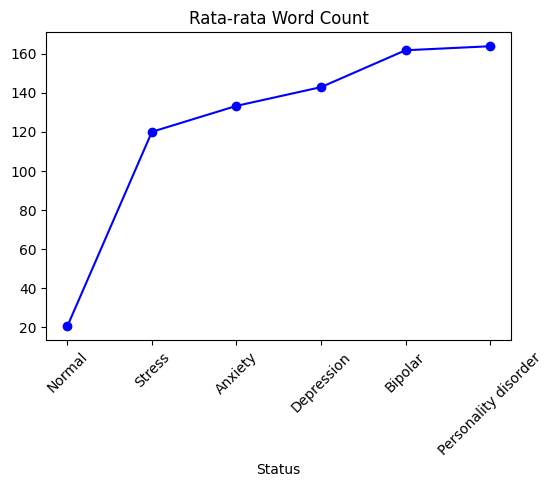

In [ ]:
# Menghitung rata-rata word count per label, lalu mengurutkan
avg_word_count = data.groupby('status')['word_count'].mean().sort_values()

# Membuat grafik garis setelah data diurutkan
plt.figure(figsize=(6, 4))
plt.plot(avg_word_count.index, avg_word_count.values, marker='o', linestyle='-', color='b')

# Menambahkan label dan judul
plt.xlabel("Status")
plt.title("Rata-rata Word Count")

# Memutar label sumbu X agar tidak tumpang tindih
plt.xticks(rotation=45)

# Menampilkan grafik
plt.show()


## Wordcloud ##

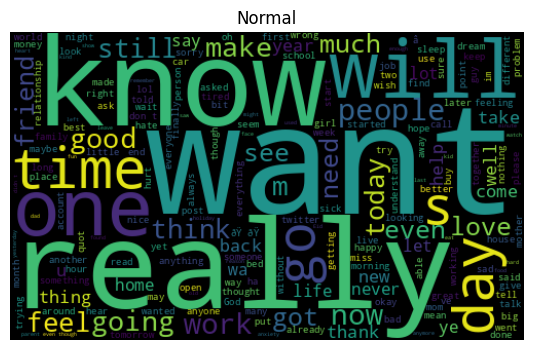

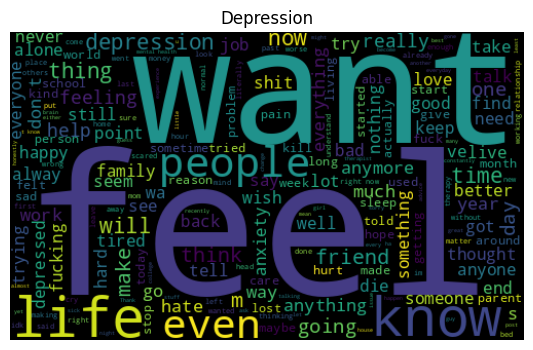

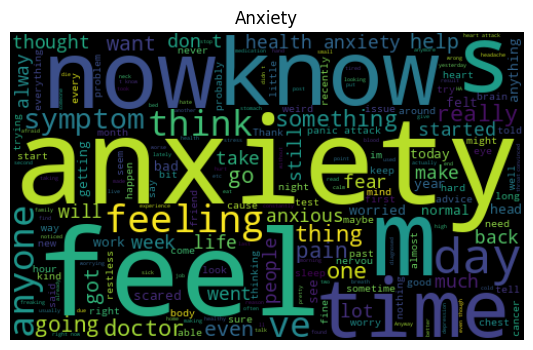

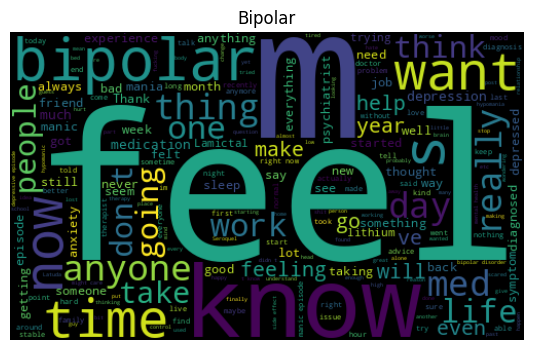

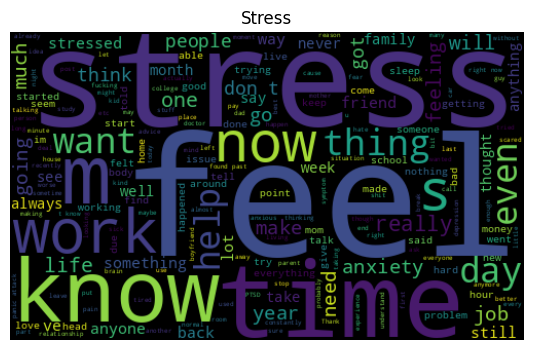

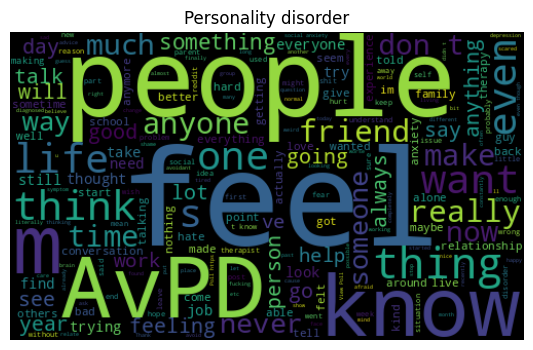

In [ ]:
categories = data['status'].value_counts().index

for cat in categories:
    statements = " ".join(data[data['status']==cat]['statement'])

    wordcloud = WordCloud(width=500, height=300).generate(statements)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis('off')
    plt.show()

## Visulisasi UMAP ##

In [ ]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')
X = model.encode(data['statement'].tolist(), show_progress_bar=True)

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

Batches:   0%|          | 0/763 [00:00<?, ?it/s]

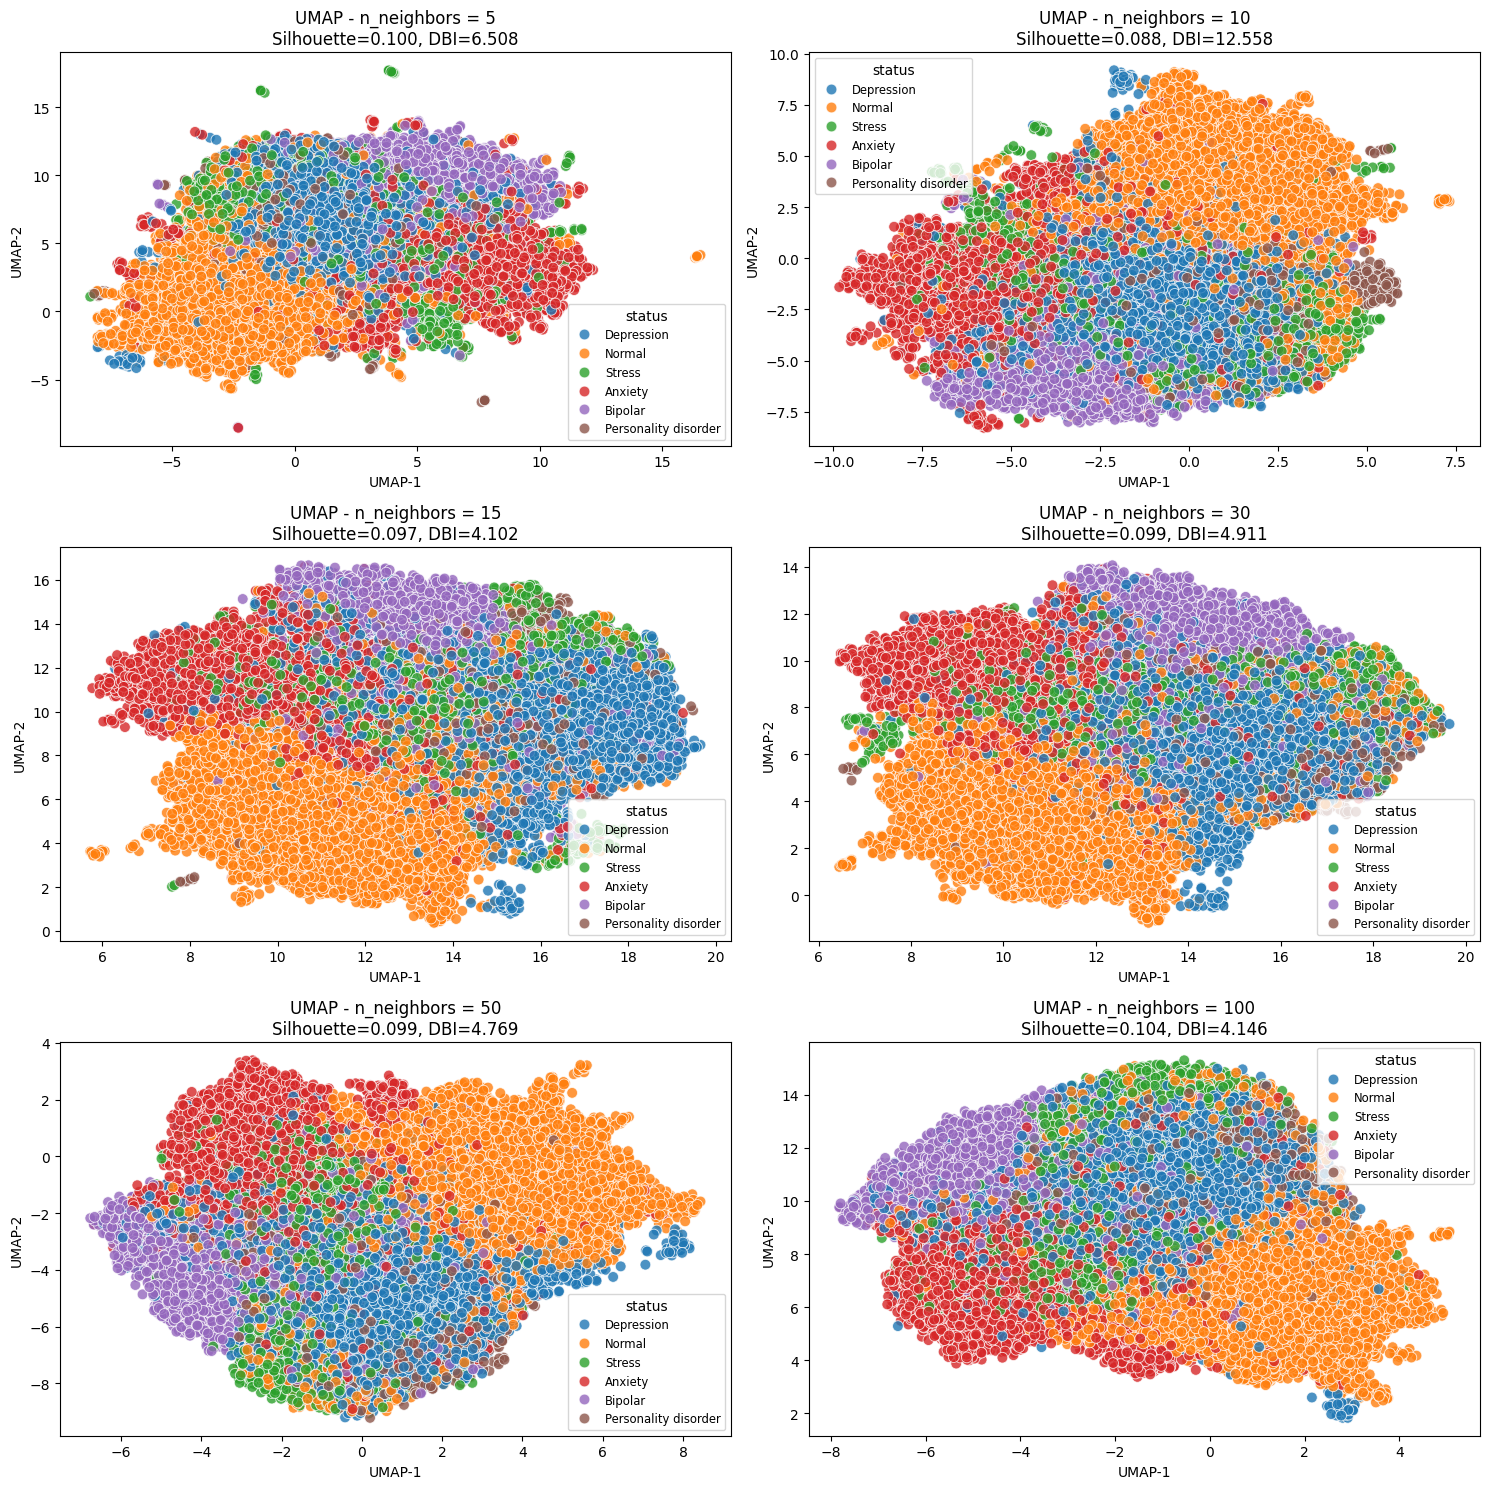

n_neighbors=5: Silhouette Score = 0.100, Davies-Bouldin Index = 6.508
n_neighbors=10: Silhouette Score = 0.088, Davies-Bouldin Index = 12.558
n_neighbors=15: Silhouette Score = 0.097, Davies-Bouldin Index = 4.102
n_neighbors=30: Silhouette Score = 0.099, Davies-Bouldin Index = 4.911
n_neighbors=50: Silhouette Score = 0.099, Davies-Bouldin Index = 4.769
n_neighbors=100: Silhouette Score = 0.104, Davies-Bouldin Index = 4.146


In [ ]:
import umap.umap_ as umap
from sklearn.metrics import silhouette_score, davies_bouldin_score

k_values = [5, 10, 15, 30, 50, 100]
sil_scores = []
db_scores = []

plt.figure(figsize=(15, 15))

for i, k in enumerate(k_values):
    # UMAP dengan n_neighbors = k
    umap_model = umap.UMAP(n_neighbors=k, min_dist=0.8, metric='cosine', random_state=42)
    X_umap = umap_model.fit_transform(X)

    # Simpan skor evaluasi
    sil = silhouette_score(X_umap, data['status'])
    db = davies_bouldin_score(X_umap, data['status'])
    sil_scores.append(sil)
    db_scores.append(db)

    # Buat DataFrame untuk plotting
    umap_df = pd.DataFrame({
        'x': X_umap[:, 0],
        'y': X_umap[:, 1],
        'status': data['status']
    })

    # Subplot
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(data=umap_df, x='x', y='y', hue='status', palette='tab10', s=60, alpha=0.8)
    plt.title(f'UMAP - n_neighbors = {k}\nSilhouette={sil:.3f}, DBI={db:.3f}')
    plt.xlabel('UMAP-1')
    plt.ylabel('UMAP-2')
    plt.legend(loc='best', title='status', fontsize='small')

plt.tight_layout()
plt.show()

# Cetak skor akhir
for i, k in enumerate(k_values):
    print(f"n_neighbors={k}: Silhouette Score = {sil_scores[i]:.3f}, Davies-Bouldin Index = {db_scores[i]:.3f}")


In [ ]:
umap_model = umap.UMAP(n_neighbors=30, min_dist=0.8, metric='cosine', random_state=42)
X_umap = umap_model.fit_transform(X)

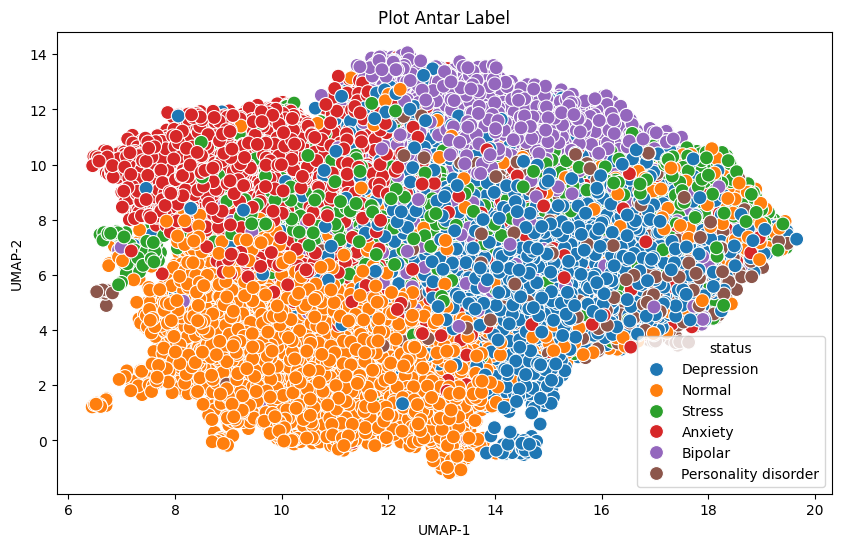

In [ ]:
# Siapkan data untuk plot
umap_df = pd.DataFrame({
    'x': X_umap[:, 0],
    'y': X_umap[:, 1],
    'status': data['status']
})

plt.figure(figsize=(10, 6))
sns.scatterplot(data=umap_df, x='x', y='y', hue='status', palette='tab10', s=100)
plt.title('Plot Antar Label')
plt.xlabel('UMAP-1')
plt.ylabel('UMAP-2')
plt.legend(title='status')
plt.show()


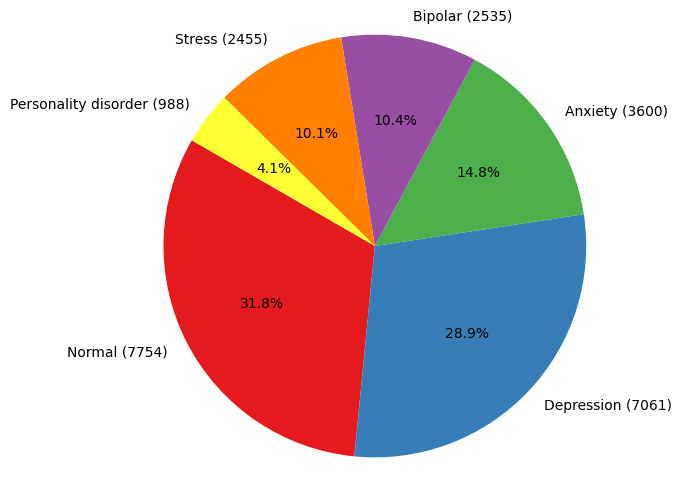

In [ ]:
# Menghitung distribusi label di kolom 'status' dari DataFrame data
label_counts = data['status'].value_counts()

# Membuat label dengan jumlah teks dan persentase
labels = [f"{label} ({count})" for label, count in zip(label_counts.index, label_counts)]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=150, colors=plt.cm.Set1.colors)

# Menampilkan pie chart
plt.axis('equal')  # Menjaga agar pie chart berbentuk lingkaran
plt.show()


In [ ]:
data = data.reset_index(drop=True)

In [ ]:
data = data.drop(columns=['word_count'])
data

Unnamed: 0                                          statement  \
0               1  could you imagine angel eva fight against tita...   
1               2  i am on week on prozac and experiencing no rea...   
2               3           i hope so. i have to go to the bathroom.   
3               5  I feel like I never stood a chance I was made ...   
4               6  but of course the document with the important ...   
...           ...                                                ...   
24388       29718  Hey reddit. I do not know what is wrong with m...   
24389       29719  "Fuck you bitch, I can make your life hell and...   
24390       29720  You've only been playing for a while, don't be...   
24391       29721  My mom [54F] has catered to his every need sin...   
24392       29723  [Kinda Gross] Hey what is this in my throat, I...   

           status  
0      Depression  
1      Depression  
2          Normal  
3      Depression  
4          Normal  
...           ...  
24388  Depression  
24389      Stress  
24390      Normal  
24391      Normal  
24392     Anxiety  

[24393 rows x 3 columns]

## Seleksi Variabel ##

In [ ]:
data['Unnamed: 0'] = range(1, len(data) + 1)
data

Unnamed: 0                                          statement  \
0               1  could you imagine angel eva fight against tita...   
1               2  i am on week on prozac and experiencing no rea...   
2               3           i hope so. i have to go to the bathroom.   
3               4  I feel like I never stood a chance I was made ...   
4               5  but of course the document with the important ...   
...           ...                                                ...   
24388       24389  Hey reddit. I do not know what is wrong with m...   
24389       24390  "Fuck you bitch, I can make your life hell and...   
24390       24391  You've only been playing for a while, don't be...   
24391       24392  My mom [54F] has catered to his every need sin...   
24392       24393  [Kinda Gross] Hey what is this in my throat, I...   

           status  
0      Depression  
1      Depression  
2          Normal  
3      Depression  
4          Normal  
...           ...  
24388  Depression  
24389      Stress  
24390      Normal  
24391      Normal  
24392     Anxiety  

[24393 rows x 3 columns]

In [ ]:
data.drop(columns=["Unnamed: 0"], inplace=True)
data

statement      status
0      could you imagine angel eva fight against tita...  Depression
1      i am on week on prozac and experiencing no rea...  Depression
2               i hope so. i have to go to the bathroom.      Normal
3      I feel like I never stood a chance I was made ...  Depression
4      but of course the document with the important ...      Normal
...                                                  ...         ...
24388  Hey reddit. I do not know what is wrong with m...  Depression
24389  "Fuck you bitch, I can make your life hell and...      Stress
24390  You've only been playing for a while, don't be...      Normal
24391  My mom [54F] has catered to his every need sin...      Normal
24392  [Kinda Gross] Hey what is this in my throat, I...     Anxiety

[24393 rows x 2 columns]

In [ ]:
data

statement      status
0      could you imagine angel eva fight against tita...  Depression
1      i am on week on prozac and experiencing no rea...  Depression
2               i hope so. i have to go to the bathroom.      Normal
3      I feel like I never stood a chance I was made ...  Depression
4      but of course the document with the important ...      Normal
...                                                  ...         ...
24388  Hey reddit. I do not know what is wrong with m...  Depression
24389  "Fuck you bitch, I can make your life hell and...      Stress
24390  You've only been playing for a while, don't be...      Normal
24391  My mom [54F] has catered to his every need sin...      Normal
24392  [Kinda Gross] Hey what is this in my throat, I...     Anxiety

[24393 rows x 2 columns]

## Cek duplikat & Missing Value ##

In [ ]:
data.duplicated().sum()

1032

Menghapus data duplikat

In [ ]:
data.drop_duplicates(subset='statement', inplace=True)

In [ ]:
data.duplicated().sum()

0

cek missing value

In [ ]:
data.isnull().sum()

statement    0
status       0
dtype: int64

In [ ]:
(data['statement'].str.strip() == '').sum()

0

In [ ]:
data['status'].value_counts()

status
Normal                  7684
Depression              6987
Anxiety                 3394
Bipolar                 2277
Stress                  2189
Personality disorder     824
Name: count, dtype: int64

## Penghapusan Kareakter Non-Alphabet ##

In [ ]:
# Simpan teks asli sebelum preprocessing
data['original_statement'] = data['statement']

In [ ]:
# Remove text inside brackets
data['statement'] = data['statement'].apply(lambda x: re.sub(r'[\[\]\(\)\{\}]+', '', x))
data

statement      status  \
0      could you imagine angel eva fight against tita...  Depression   
1      i am on week on prozac and experiencing no rea...  Depression   
2               i hope so. i have to go to the bathroom.      Normal   
3      I feel like I never stood a chance I was made ...  Depression   
4      but of course the document with the important ...      Normal   
...                                                  ...         ...   
24388  Hey reddit. I do not know what is wrong with m...  Depression   
24389  "Fuck you bitch, I can make your life hell and...      Stress   
24390  You've only been playing for a while, don't be...      Normal   
24391  My mom 54F has catered to his every need since...      Normal   
24392  Kinda Gross Hey what is this in my throat, I'm...     Anxiety   

                                      original_statement  
0      could you imagine angel eva fight against tita...  
1      i am on week on prozac and experiencing no rea...  
2               i hope so. i have to go to the bathroom.  
3      I feel like I never stood a chance I was made ...  
4      but of course the document with the important ...  
...                                                  ...  
24388  Hey reddit. I do not know what is wrong with m...  
24389  "Fuck you bitch, I can make your life hell and...  
24390  You've only been playing for a while, don't be...  
24391  My mom [54F] has catered to his every need sin...  
24392  [Kinda Gross] Hey what is this in my throat, I...  

[23355 rows x 3 columns]

In [ ]:
# Case folding (konversi ke huruf kecil)
data['statement'] = data['statement'].str.lower()
data

statement      status  \
0      could you imagine angel eva fight against tita...  Depression   
1      i am on week on prozac and experiencing no rea...  Depression   
2               i hope so. i have to go to the bathroom.      Normal   
3      i feel like i never stood a chance i was made ...  Depression   
4      but of course the document with the important ...      Normal   
...                                                  ...         ...   
24388  hey reddit. i do not know what is wrong with m...  Depression   
24389  "fuck you bitch, i can make your life hell and...      Stress   
24390  you've only been playing for a while, don't be...      Normal   
24391  my mom 54f has catered to his every need since...      Normal   
24392  kinda gross hey what is this in my throat, i'm...     Anxiety   

                                      original_statement  
0      could you imagine angel eva fight against tita...  
1      i am on week on prozac and experiencing no rea...  
2               i hope so. i have to go to the bathroom.  
3      I feel like I never stood a chance I was made ...  
4      but of course the document with the important ...  
...                                                  ...  
24388  Hey reddit. I do not know what is wrong with m...  
24389  "Fuck you bitch, I can make your life hell and...  
24390  You've only been playing for a while, don't be...  
24391  My mom [54F] has catered to his every need sin...  
24392  [Kinda Gross] Hey what is this in my throat, I...  

[23355 rows x 3 columns]

In [ ]:
# Remove punctuation
def remove_punctuation(text):
    return "".join([char for char in text if char not in string.punctuation])

data['statement'] = data['statement'].apply(remove_punctuation)
data

statement      status  \
0      could you imagine angel eva fight against tita...  Depression   
1      i am on week on prozac and experiencing no rea...  Depression   
2                 i hope so i have to go to the bathroom      Normal   
3      i feel like i never stood a chance i was made ...  Depression   
4      but of course the document with the important ...      Normal   
...                                                  ...         ...   
24388  hey reddit i do not know what is wrong with me...  Depression   
24389  fuck you bitch i can make your life hell and g...      Stress   
24390  youve only been playing for a while dont be si...      Normal   
24391  my mom 54f has catered to his every need since...      Normal   
24392  kinda gross hey what is this in my throat im k...     Anxiety   

                                      original_statement  
0      could you imagine angel eva fight against tita...  
1      i am on week on prozac and experiencing no rea...  
2               i hope so. i have to go to the bathroom.  
3      I feel like I never stood a chance I was made ...  
4      but of course the document with the important ...  
...                                                  ...  
24388  Hey reddit. I do not know what is wrong with m...  
24389  "Fuck you bitch, I can make your life hell and...  
24390  You've only been playing for a while, don't be...  
24391  My mom [54F] has catered to his every need sin...  
24392  [Kinda Gross] Hey what is this in my throat, I...  

[23355 rows x 3 columns]

In [ ]:
# Remove numbers, URLs, usernames, underscores, and hashtags
def clean_text(text):
    text = re.sub(r'http\S+|www\S+|https\S+', '', text)  # Remove URLs
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'\b\w+_\w+\b', '', text)  # Remove underscores
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub('[^A-Za-z ]+', '', text)  # Remove non-alphabet characters
    text = re.sub(r'²', '', text)  # Remove special characters
    text = re.sub(r"\W", " ", text)  # Remove non-alphanumeric characters
    return text

data['statement'] = data['statement'].apply(clean_text)
data

statement      status  \
0      could you imagine angel eva fight against tita...  Depression   
1      i am on week on prozac and experiencing no rea...  Depression   
2                 i hope so i have to go to the bathroom      Normal   
3      i feel like i never stood a chance i was made ...  Depression   
4      but of course the document with the important ...      Normal   
...                                                  ...         ...   
24388  hey reddit i do not know what is wrong with me...  Depression   
24389  fuck you bitch i can make your life hell and g...      Stress   
24390  youve only been playing for a while dont be si...      Normal   
24391  my mom f has catered to his every need since m...      Normal   
24392  kinda gross hey what is this in my throat im k...     Anxiety   

                                      original_statement  
0      could you imagine angel eva fight against tita...  
1      i am on week on prozac and experiencing no rea...  
2               i hope so. i have to go to the bathroom.  
3      I feel like I never stood a chance I was made ...  
4      but of course the document with the important ...  
...                                                  ...  
24388  Hey reddit. I do not know what is wrong with m...  
24389  "Fuck you bitch, I can make your life hell and...  
24390  You've only been playing for a while, don't be...  
24391  My mom [54F] has catered to his every need sin...  
24392  [Kinda Gross] Hey what is this in my throat, I...  

[23355 rows x 3 columns]

In [ ]:
# Remove stock market tickers like $GE
data['statement'] = data['statement'].apply(lambda x: re.sub(r'\$\w*', '', x))

# Remove HTML tags
data['statement'] = data['statement'].apply(lambda x: re.sub(r'<[^>]+>', '', x))
data

statement      status  \
0      could you imagine angel eva fight against tita...  Depression   
1      i am on week on prozac and experiencing no rea...  Depression   
2                 i hope so i have to go to the bathroom      Normal   
3      i feel like i never stood a chance i was made ...  Depression   
4      but of course the document with the important ...      Normal   
...                                                  ...         ...   
24388  hey reddit i do not know what is wrong with me...  Depression   
24389  fuck you bitch i can make your life hell and g...      Stress   
24390  youve only been playing for a while dont be si...      Normal   
24391  my mom f has catered to his every need since m...      Normal   
24392  kinda gross hey what is this in my throat im k...     Anxiety   

                                      original_statement  
0      could you imagine angel eva fight against tita...  
1      i am on week on prozac and experiencing no rea...  
2               i hope so. i have to go to the bathroom.  
3      I feel like I never stood a chance I was made ...  
4      but of course the document with the important ...  
...                                                  ...  
24388  Hey reddit. I do not know what is wrong with m...  
24389  "Fuck you bitch, I can make your life hell and...  
24390  You've only been playing for a while, don't be...  
24391  My mom [54F] has catered to his every need sin...  
24392  [Kinda Gross] Hey what is this in my throat, I...  

[23355 rows x 3 columns]

In [ ]:
# Remove emojis
def remove_emoji(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # Emoticons
                               u"\U0001F300-\U0001F5FF"  # Symbols & Pictographs
                               u"\U0001F680-\U0001F6FF"  # Transport & Map Symbols
                               u"\U0001F700-\U0001F77F"  # Alchemical Symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"  # Enclosed Characters and Miscellaneous Symbols
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

data['statement'] = data['statement'].apply(remove_emoji)
data

statement      status  \
0      could you imagine angel eva fight against tita...  Depression   
1      i am on week on prozac and experiencing no rea...  Depression   
2                 i hope so i have to go to the bathroom      Normal   
3      i feel like i never stood a chance i was made ...  Depression   
4      but of course the document with the important ...      Normal   
...                                                  ...         ...   
24388  hey reddit i do not know what is wrong with me...  Depression   
24389  fuck you bitch i can make your life hell and g...      Stress   
24390  youve only been playing for a while dont be si...      Normal   
24391  my mom f has catered to his every need since m...      Normal   
24392  kinda gross hey what is this in my throat im k...     Anxiety   

                                      original_statement  
0      could you imagine angel eva fight against tita...  
1      i am on week on prozac and experiencing no rea...  
2               i hope so. i have to go to the bathroom.  
3      I feel like I never stood a chance I was made ...  
4      but of course the document with the important ...  
...                                                  ...  
24388  Hey reddit. I do not know what is wrong with m...  
24389  "Fuck you bitch, I can make your life hell and...  
24390  You've only been playing for a while, don't be...  
24391  My mom [54F] has catered to his every need sin...  
24392  [Kinda Gross] Hey what is this in my throat, I...  

[23355 rows x 3 columns]

In [ ]:
# Remove "view pool"
data['statement'] = data['statement'].apply(lambda x: re.sub(r'\bview pool\b', '', x))

# Remove tabulation, new lines, and extra spaces
data['statement'] = data['statement'].str.replace("\n", " ").replace("\r", " ").replace("\t", " ")
data['statement'] = data['statement'].apply(lambda x: re.sub(r"\s+", " ", x).strip())

data

statement      status  \
0      could you imagine angel eva fight against tita...  Depression   
1      i am on week on prozac and experiencing no rea...  Depression   
2                 i hope so i have to go to the bathroom      Normal   
3      i feel like i never stood a chance i was made ...  Depression   
4      but of course the document with the important ...      Normal   
...                                                  ...         ...   
24388  hey reddit i do not know what is wrong with me...  Depression   
24389  fuck you bitch i can make your life hell and g...      Stress   
24390  youve only been playing for a while dont be si...      Normal   
24391  my mom f has catered to his every need since m...      Normal   
24392  kinda gross hey what is this in my throat im k...     Anxiety   

                                      original_statement  
0      could you imagine angel eva fight against tita...  
1      i am on week on prozac and experiencing no rea...  
2               i hope so. i have to go to the bathroom.  
3      I feel like I never stood a chance I was made ...  
4      but of course the document with the important ...  
...                                                  ...  
24388  Hey reddit. I do not know what is wrong with m...  
24389  "Fuck you bitch, I can make your life hell and...  
24390  You've only been playing for a while, don't be...  
24391  My mom [54F] has catered to his every need sin...  
24392  [Kinda Gross] Hey what is this in my throat, I...  

[23355 rows x 3 columns]

In [ ]:
# Fungsi untuk menghapus variasi tawa
def remove_laughter(text):
    # Pola regex untuk mendeteksi variasi tawa (jajaja, hehehe, hihihi, hohoho, hahaha, wkwkwk)
    text = re.sub(r'\b([jh][aeiou]{1,2})\1+\b|\b(wk)+w*\b', '', text, flags=re.IGNORECASE)
    return text.strip()  # Hapus spasi ekstra setelah penghapusan

# Contoh penggunaan dengan kolom 'tweet_text' pada DataFrame
data['statement'] = data['statement'].apply(lambda x: remove_laughter(x))

data


statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people were laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i dont feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried therapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded just how ugly i am i want to accept it but its so

In [ ]:
# Kamus kontraksi dan singkatan kesehatan mental yang telah diperluas
contraction_map_no_punctuation = {
    "cant": "can not",
    "aint": "am not",
    "nt": "not",
    "ll": "will",
    "wont": "will not",
    "dont": "do not",
    "im": "i am",
    "youre": "you are",
    "hes": "he is",
    "shes": "she is",
    "its": "it is",
    "were": "we are",
    "theyre": "they are",
    "ive": "i have",
    "youve": "you have",
    "weve": "we have",
    "theyve": "they have",
    "id": "i would",
    "youd": "you would",
    "hed": "he would",
    "shed": "she would",
    "wed": "we would",
    "theyd": "they would",
    "ppl": "people",
    "adhd": "attention deficit hyperactivity disorder",
    "anx": "anxiety",
    "bpd": "borderline personality disorder",
    "cbt": "cognitive behavioral therapy",
    "cptsd": "complex post traumatic stress disorder",
    "csa": "child sexual abuse",
    "dsm": "diagnostic and statistical manual of mental disorders",
    "dx": "diagnosis",
    "ed": "eating disorder",
    "gad": "generalized anxiety disorder",
    "hocd": "homosexual obsessive compulsive disorder",
    "mdd": "major depressive disorder",
    "mh": "mental health",
    "ocd": "obsessive compulsive disorder",
    "panicdis": "panic disorder",
    "pmdd": "premenstrual dysphoric disorder",
    "ptsd": "post traumatic stress disorder",
    "rx": "prescription",
    "sad": "seasonal affective disorder",
    "schizo": "schizophrenia",
    "serotonin": "a neurotransmitter related to mood regulation",
    "sza": "schizoaffective disorder",
    "tbi": "traumatic brain injury",
    "td": "tardive dyskinesia",
    "therapy": "psychotherapy",
    "tms": "transcranial magnetic stimulation",
    "trd": "treatment resistant depression",
    "ts": "tourette syndrome",
    'afaik': 'as far as i know',
    'afk': 'away from keyboard',
    'asap': 'as soon as possible',
    'atk': 'at the keyboard',
    'atm': 'at the moment',
    'a3': 'anytime, anywhere, anyplace',
    'bak': 'back at keyboard',
    'bbl': 'be back later',
    'bbs': 'be back soon',
    'bfn': 'bye for now',
    'b4n': 'bye for now',
    'brb': 'be right back',
    'brt': 'be right there',
    'btw': 'by the way',
    'b4': 'before',
    'cu': 'see you',
    'cul8r': 'see you later',
    'cya': 'see you',
    'dm' : 'direct message',
    'faq': 'frequently asked questions',
    'fc': 'fingers crossed',
    'fwiw': 'for what it is worth',
    'fyi': 'for your information',
    'gal': 'get a life',
    'gg': 'good game',
    'ggez': 'good game easy',
    'ez': 'ez',
    'gl': 'good luck',
    'glhf': 'good luck have fun',
    'gn': 'good night',
    'gmta': 'great minds think alike',
    'gotta': 'got to',
    'gr8': 'great',
    'g9': 'genius',
    'hf': 'have fun',
    'ic': 'i see',
    'icq': 'i seek you',
    'ilu': 'i love you',
    'imho': 'in my honest opinion',
    'imo': 'in my opinion',
    'iow': 'in other words',
    'irl': 'in real life',
    'kiss': 'keep it simple stupid',
    'ldr': 'long distance relationship',
    'lmao': 'laugh my ass off',
    'lol': 'laughing out loud',
    'ltns': 'long time no see',
    'luv': 'love',
    'l8r': 'later',
    'mte': 'my thoughts exactly',
    'm8': 'mate',
    'nrn': 'no reply necessary',
    'oic': 'oh i see',
    'pita': 'pain in the ass',
    'prt': 'party',
    'prw': 'parents are watching',
    'qpsa?': 'que pasa?',
    'rofl': 'rolling laughing',
    'roflol': 'rolling laughing out loud',
    'rotflmao': 'rolling laughing my ass off',
    'sk8': 'skate',
    'asl': 'age, sex, location',
    'thx': 'thank you',
    'ttfn': 'tata for now',
    'ttyl': 'talk to you later',
    'u': 'you',
    'u2': 'you too',
    'u4e': 'yours for ever',
    'wb': 'welcome back',
    'wtf': 'what the fuck',
    'wtg': 'way to go',
    'wuf': 'where are you from?',
    'w8': 'wait',
    'tfw': 'that feeling when',
    'mfw': 'my face when',
    'mrw': 'my reaction when',
    'ifyp': 'i feel your pain',
    'lol': 'laughing out loud',
    'tntl': 'trying not to laugh',
    'jk': 'just kidding',
    'idc': 'i do not care',
    'ily': 'i love you',
    'imu': 'i miss you',
    'adih': 'another day in hell',
    'zzz': 'sleeping',
    'wywh': 'wish you were here',
    'fimh': 'forever in my heart',
    'bsaaw': 'big smile and a wink',
    'bwl': 'bursting with laughter',
    'lmao': 'laughing my ass off',
    'bff': 'best friends forever',
    'csl': 'can not stop laughing',
    'tmi': 'too much information',
    'yolo': 'you only live once',
    'gurl': 'girl',
    'mum':'mother',
    'thanks':'thank you',
    'arent':'are not',
    'isso':'that is',
    'fyi' : 'for your information',
    'rt': 'retweet'
}

# Fungsi untuk memperluas kontraksi dalam teks
def expand_contractions(text, contraction_map):
    for contraction, expanded in contraction_map.items():
        text = re.sub(r'\b' + re.escape(contraction) + r'\b', expanded, text, flags=re.IGNORECASE)
    return text

# Terapkan fungsi ke kolom 'tweet_text'
data['statement'] = data['statement'].apply(lambda x: expand_contractions(x, contraction_map_no_punctuation))
data

statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people we are laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i do not feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried psychotherapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded jus

In [ ]:
# Mengatur agar teks panjang ditampilkan utuh
pd.set_option('display.max_colwidth', None)

# Menampilkan satu baris teks dari DataFrame untuk ketiga kolom
print(data.iloc[7])  # Menampilkan seluruh baris pertama

statement    i do not know i do not know what to do i just want out of here it is too hard with this house and school work
status                                                                                                              Stress
Name: 7, dtype: object


In [ ]:
data.drop(columns=['original_statement'], inplace=True)

## Cek duplikat & Missing Value Kembali ##

In [ ]:
data['statement'].duplicated().sum()

39

In [ ]:
df3 = data.drop_duplicates(subset=['statement'], keep='first').reset_index(drop=True)
df3

statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people we are laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i do not feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried psychotherapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded jus

In [ ]:
df3.isnull().sum()

statement    0
status       0
dtype: int64

In [ ]:
(df3['statement'].str.strip()=='').sum()

0

In [ ]:
df3

statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people we are laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i do not feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried psychotherapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded jus

In [ ]:
df3['status'].value_counts()

status
Normal                  7662
Depression              6984
Anxiety                 3382
Bipolar                 2277
Stress                  2189
Personality disorder     822
Name: count, dtype: int64

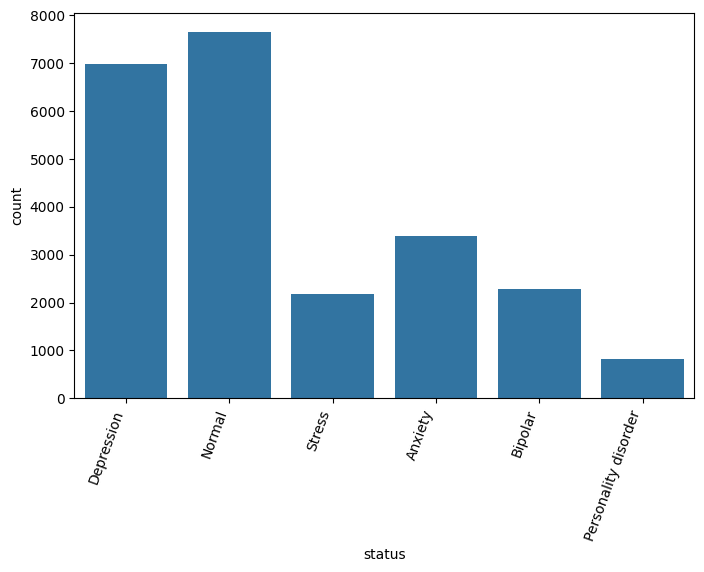

In [ ]:
# Plot Sebelum Resampling
plt.figure(figsize=(8, 5))
sns.countplot(x = df3.status)
plt.xticks(rotation=70, ha='right')
plt.show()

In [ ]:
contoh_statements = df3.groupby('status')['statement'].apply(lambda x: x.sample(n=1))

# Print the results with the index
for status, statement in contoh_statements.items():
    index = contoh_statements.index[contoh_statements == statement][0]  # Ambil index baris yang diambil
    print(f"Status: {status}")
    print(f"Statement: {statement}\n")

Status: ('Anxiety', 16958)
Statement: it is been a week i feel restless and my head feels full i want to rest while i sleep

Status: ('Bipolar', 4167)
Statement: can not pinpoint moodsfeelings hi everyoneim very new here so please forgive me if this has already been discussedi was recently diagnosed and prescribed lamictal this happened two days ago i have been seeing a counselor for some other issues and she recommended going to psychiatristmy therapistpsychiatrist recommend keeping track of my moods this seems so easyso i write down how i am feeling or rate how i am feeling i have been trying to do this for the past month i have found it so hard to identify my emotionsmoodsfeelingsi sit down and either use an app dayio evernote or a physical notebook to start my journaling i get in my own head so much that i can not seem to figure out how i am feeling lately it feels like i am making it all up i overthink it all so much that i think oh nevermindim fine and just move on with my day i 

In [ ]:
# Tambahkan kolom baru 'word_count' yang menghitung jumlah kata dalam 'tweet_text'
df3['word_count'] = df3['statement'].apply(lambda x: len(str(x).split()))
df3

statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people we are laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i do not feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried psychotherapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded jus

In [ ]:
# Mencari baris dengan jumlah kata maksimum
max_word_count_row = df3.loc[df3['word_count'].idxmax()]
min_word_count_row = df3.loc[df3['word_count'].idxmin()]
print(max_word_count_row)
print(min_word_count_row)

statement     so i made a similar post in confession but i guess it belongs here maybe maybe not i don t think anyone really care anyway well when i wa m i ve been tortured by two girl aged around they d wait up for me after school take me to a secluded area and sodomize me when they we are finished they would repeatedly kick my private part and punch my stomach when i would cry they said they would not stop until i stopped my cry since then i ve never cried anymore in my life and i wish i could my feeling have faded away and i thought that wa part of becoming an adult i would lay for hour in pain and then come home telling my parent i wa at a friend s this ha been going on for about a year no matter if i took a different route home or tried to run they would do this almost daily i wouldn t tell my parent because they we are threatening to kill my dog and family if i did my parent started to distrust me and thought i wa doing bad thing after school since i wouldn t share my friend s na

## Cek Distribusi Data ##

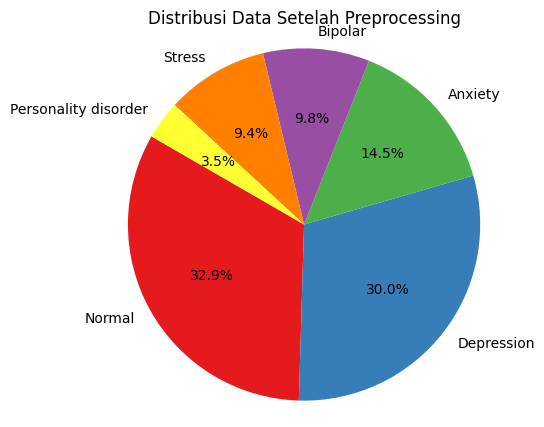

In [ ]:
# Menghitung distribusi label di kolom 'label' dari DataFrame df3
label = df3['status'].value_counts()

# Membuat pie chart
plt.figure(figsize=(5, 5))
plt.pie(label, labels=label.index, autopct='%1.1f%%', startangle=150, colors=plt.cm.Set1.colors)

# Menambahkan judul
plt.title('Distribusi Data Setelah Preprocessing')

# Menampilkan pie chart
plt.axis('equal')  # Menjaga agar pie chart berbentuk lingkaran
plt.show()

In [ ]:
word_count = df3.groupby('status')[['word_count']].describe()
word_count

word_count                                             \
                          count        mean        std   min    25%    50%   
status                                                                       
Anxiety                  3382.0  116.311059  93.440200   1.0  39.00   97.0   
Bipolar                  2277.0  141.408432  88.142011   5.0  71.00  121.0   
Depression               6984.0  132.145332  98.355450   6.0  52.00  107.0   
Normal                   7662.0   18.180240  23.142279   1.0   6.00   10.0   
Personality disorder      822.0  141.744526  96.575243   4.0  60.25  122.0   
Stress                   2189.0  103.606213  60.149367  11.0  67.00   88.0   

                                     
                         75%    max  
status                               
Anxiety               173.00  408.0  
Bipolar               197.00  415.0  
Depression            191.00  447.0  
Normal                 19.00  249.0  
Personality disorder  207.75  411.0  
Stress                122.00  415.0

In [ ]:
#Menampilkan statistik deskriptif keseluruhan data
word_overall = df3['word_count'].describe()
word_overall

count    23316.000000
mean        90.961529
std         91.991197
min          1.000000
25%         15.000000
50%         64.000000
75%        136.000000
max        447.000000
Name: word_count, dtype: float64

In [ ]:
df3.drop('word_count', axis=1, inplace=True)

In [ ]:
df3

statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people we are laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i do not feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried psychotherapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded jus

## Word Cloud ##

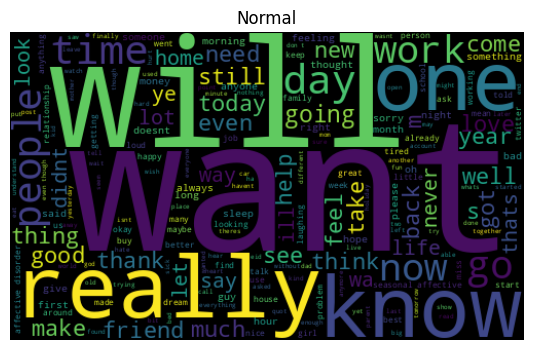

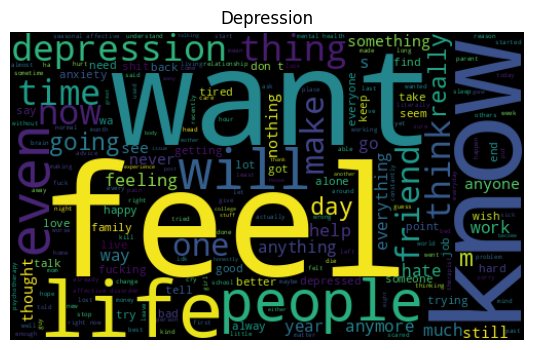

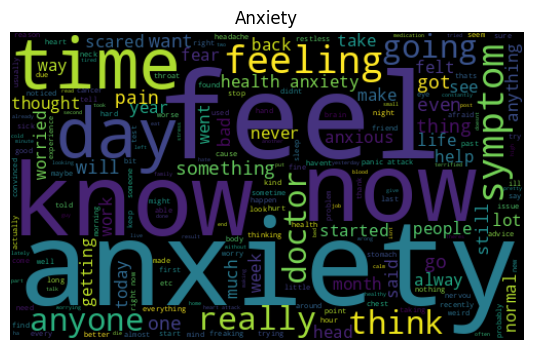

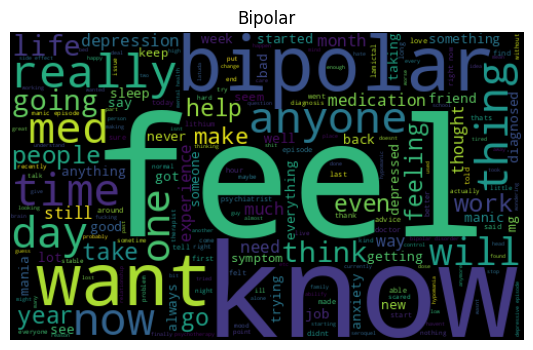

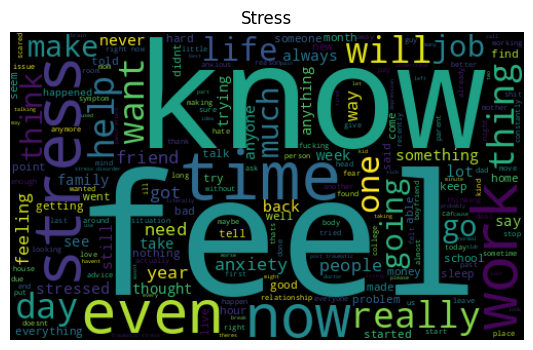

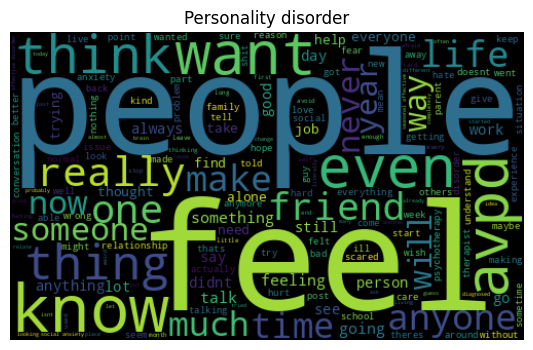

In [ ]:
categories = df3['status'].value_counts().index

for cat in categories:
    statements = " ".join(df3[df3['status']==cat]['statement'])

    wordcloud = WordCloud(width=500, height=300).generate(statements)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(cat)
    plt.axis('off')
    plt.show()

In [ ]:
df3

statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people we are laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i do not feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried psychotherapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded jus

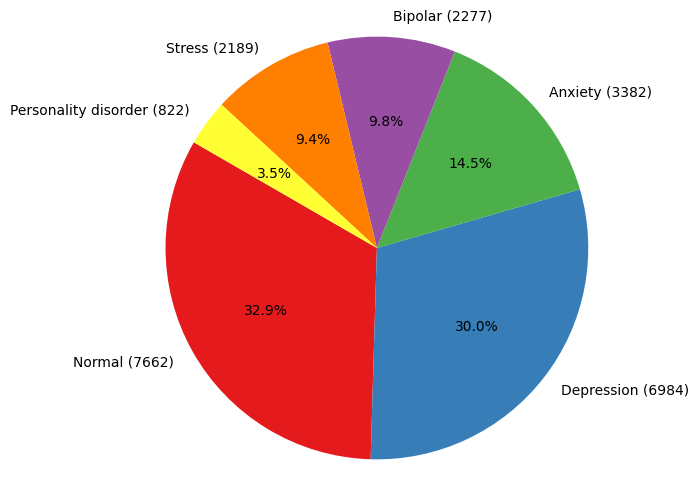

In [ ]:
# Menghitung distribusi label di kolom 'status' dari DataFrame df3
label_counts = df3['status'].value_counts()

# Membuat label dengan jumlah teks dan persentase
labels = [f"{label} ({count})" for label, count in zip(label_counts.index, label_counts)]

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=labels, autopct='%1.1f%%', startangle=150, colors=plt.cm.Set1.colors)

# Menampilkan pie chart
plt.axis('equal')  # Menjaga agar pie chart berbentuk lingkaran
plt.show()


In [ ]:
df3.to_csv('data_preprocessing (Semoga FIX_BISMILAH SEMHAS).csv', index=False)

## SPLITING DATA ##

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data=pd.read_csv('/content/data_preprocessing (Semoga FIX_BISMILAH SEMHAS).csv')
data

statement  \
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  could you imagine angel eva fight against titan we got double depression http t co rqscb dom   
1                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           i am on week on prozac and experiencing no real change i took prozac before when my anxiety wa nowhere near a bad and so i don t really remember how long it took to make me feel better i just want to feel better   
2                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        i hope so i have to go to the bathroom   
3      i feel like i never stood a chance i was made fun of over my appearance ever since i was young i was just a child and had poor self esteem and confidence even though i didnt know about those concepts yet i was afraid to interact with others and felt like everywhere i went people we are laughing at me this lasted all the way until i graduated high school years of maturing and some plastic surgery later i do not feel as self conscious but the damage has been done i hate myself i feel grotesque and worthless i want to die so that i stop feeling this way i constantly wonder why the universe would allow me to come into this world and live like this am i being punished for something i did in my past life i have tried psychotherapy but the relief was only brief i would take a picture or catch my reflection at a different angle and be reminded jus

## 80:20:20 ##

## tanpa suicidal  ##

In [ ]:
# Split data menjadi training (80%) dan testing (20%)
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42, stratify=data['status'])

# Split training 1data1 menjadi training (80%) dan validation (20% dari training)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42, stratify=train_data['status'])

# Simpan hasil split ke file CSV
train_data.to_csv("Data_train (80).csv", index=False)
test_data.to_csv("Data_test (80).csv", index=False)
val_data.to_csv("Data_val (80).csv", index=False)

# Cek jumlah data pada setiap set
print(f"Total Data: {len(data)}")
print(f"Training Data: {len(train_data)}")
print(f"Validation Data: {len(val_data)}")
print(f"Testing Data: {len(test_data)}")

Total Data: 23316
Training Data: 14921
Validation Data: 3731
Testing Data: 4664


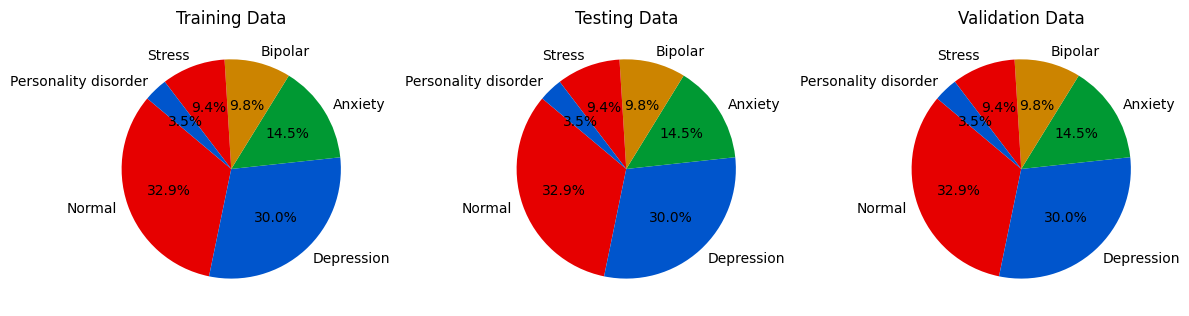

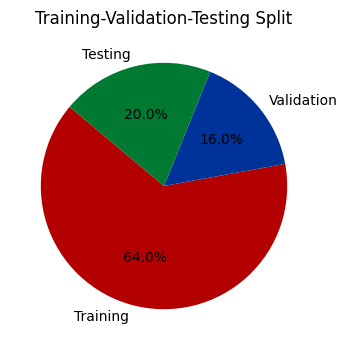

In [ ]:
import matplotlib.pyplot as plt

def plot_pie_chart(data, title, ax):
    status_counts = data['status'].value_counts()
    colors = ['#e60000', '#0055cc', '#009933', '#cc8400']  # Warna lebih pekat
    ax.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))  # Menyusun 3 pie chart secara horizontal
plot_pie_chart(train_data, "Training Data", axes[0])
plot_pie_chart(test_data, "Testing Data", axes[1])
plot_pie_chart(val_data, "Validation Data", axes[2])
plt.tight_layout()
plt.show()

# Pie chart pembagian data train, test, validation
fig, ax = plt.subplots(figsize=(4, 4))  # Ukuran lebih kecil
colors = ['#b30000', '#003399', '#007a33']  # Warna lebih pekat
ax.pie([len(train_data), len(val_data), len(test_data)], labels=['Training', 'Validation', 'Testing'], autopct='%1.1f%%', startangle=140, colors=colors)
ax.set_title("Training-Validation-Testing Split")
plt.show()
